<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


{'whiskers': [<matplotlib.lines.Line2D at 0x21e1d4e3af0>,
 'caps': [<matplotlib.lines.Line2D at 0x21e1d4b0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e1d0dc070>],
 'medians': [<matplotlib.lines.Line2D at 0x21e1d51c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e1d4a5490>],
 'means': []}

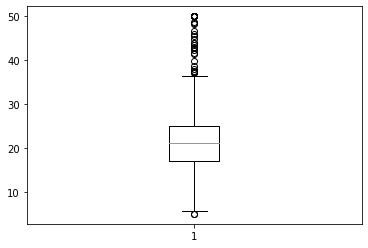

In [15]:
plt.boxplot(boston_df['MEDV'])

<BarContainer object of 2 artists>

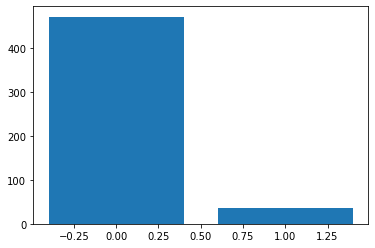

In [14]:
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts())

{'whiskers': [<matplotlib.lines.Line2D at 0x21e1e9b9f70>,
 'caps': [<matplotlib.lines.Line2D at 0x21e1eaf94c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e1e96d3a0>,
 'medians': [<matplotlib.lines.Line2D at 0x21e1ebd8dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21e1ec36040>,
 'means': []}

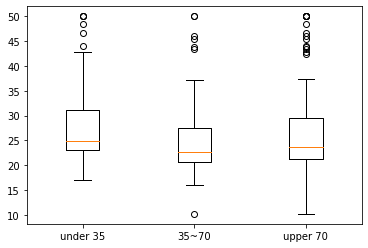

In [42]:
plt.boxplot([boston_df[boston_df['AGE']<=35]['MEDV'],\
            (boston_df[(boston_df['AGE']>35) & (boston_df['AGE']<=70) ]['MEDV']),\
            boston_df[boston_df['AGE']<=70]['MEDV']],labels=['under 35','35~70','upper 70'])

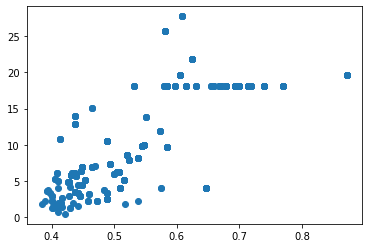

In [43]:
plt.scatter(x=boston_df['NOX'],y=boston_df['INDUS'])

NOX bigger -> INDUS bigger

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

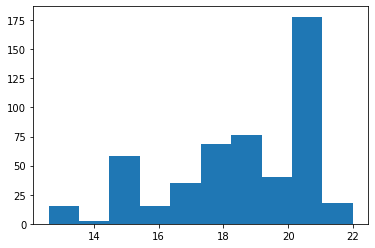

In [44]:
plt.hist(boston_df['PTRATIO'])

In [45]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [47]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

H0 = There is No diffence between CHANS AND MEDV <br>
There is difference

In [50]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [52]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [53]:
lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
mid = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [54]:
f_statistic, p_value = scipy.stats.f_oneway(lower, mid, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


h0 : u1=u2=u3
reslut = least one of the means differ

In [56]:
scipy.stats.pearsonr(x=boston_df['NOX'],y=boston_df['INDUS'])

(0.7636514469209159, 7.913361061232396e-98)

h0 = not correlated
result = correlated

In [61]:
X = boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        20:54:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R_squared = 0.61
R = 0.247

0.2469817807045694